## Dataset Feature Selection for forecasting models


### PCA

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [17]:
turbine = "BHR58"

In [181]:
field_data_filepath = f"../data/Field data/{turbine}.csv" 
raw_field_data_df = pd.read_csv(f"{field_data_filepath}") #.rename(columns={"Unnamed: 0": "t"})
field_data_df = raw_field_data_df.rename(columns={"RelWndDir": "wind_direction"}).drop(columns=["DateTime", "Unnamed: 0"])
data_np = field_data_df.to_numpy()
field_data_df

,index,Available,AirDensity,AmbientTemperature,GeneratorSpeed,NacellePosition,OpSt,Pitch,TurbulenceIntensity,wind_direction,Power,WndSpd,WFCErrorCode,WFCStrategy,YawOffsetApplied,YawOffsetSetPoint,NacellePosition_corrected,t
0,737825.771528,1.0,1.173693,22.997962,1049.683604,202.000000,5.0,1.978292,0.000000,-11.243843,80.444262,3.142606,120.0,0.0,0.0,0.0,203.000000,1580841060
1,737825.772222,1.0,1.173693,22.995828,1050.045902,202.000000,5.0,2.175399,0.000000,-3.337559,61.029508,2.855279,120.0,0.0,0.0,0.0,203.000000,1580841120
2,737825.772917,1.0,1.173737,22.941631,1050.203279,202.000000,5.0,2.097874,0.000000,-5.951530,83.580328,3.075196,120.0,0.0,0.0,0.0,203.000000,1580841180
3,737825.773611,1.0,1.173825,22.938752,1049.860650,202.000000,5.0,1.931436,0.000000,-3.580656,99.180328,3.308791,120.0,0.0,0.0,0.0,203.000000,1580841240
4,737825.774306,1.0,1.173892,22.911952,1050.014752,202.000000,5.0,2.073207,0.000000,-2.797459,65.688525,3.009422,120.0,0.0,0.0,0.0,203.000000,1580841300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98825,737897.365278,1.0,1.158603,28.222484,1049.965580,279.000000,5.0,1.625018,31.211262,5.941721,142.618033,3.716513,120.0,0.0,0.0,0.0,280.000000,1587026760
98826,737897.365972,1.0,1.158466,28.342170,1049.867208,279.459016,5.0,1.658077,28.887142,14.948579,136.906558,3.674494,120.0,0.0,0.0,0.0,280.459016,1587026820
98827,737897.366667,1.0,1.158218,28.460962,1049.972132,289.655738,5.0,1.937248,27.492654,0.324708,74.631148,3.090240,120.0,0.0,0.0,0.0,290.655738,1587026880
98828,737897.367361,1.0,1.158052,28.373715,1049.921317,291.622951,5.0,1.932489,28.574593,19.135410,102.970492,3.393056,120.0,0.0,0.0,0.0,292.622951,1587026940


In [183]:
# identify month, day, hour of timestamps
field_data_df['Date'] = pd.to_datetime(field_data_df['t'], unit='s')
field_data_df["Month"] = field_data_df.Date.dt.month
field_data_df["Day"] = field_data_df.Date.dt.day
field_data_df["Hour"] = field_data_df.Date.dt.hour
field_data_df

,index,Available,AirDensity,AmbientTemperature,GeneratorSpeed,NacellePosition,OpSt,Pitch,TurbulenceIntensity,wind_direction,...,WFCErrorCode,WFCStrategy,YawOffsetApplied,YawOffsetSetPoint,NacellePosition_corrected,t,Date,Month,Day,Hour
0,737825.771528,1.0,1.173693,22.997962,1049.683604,202.000000,5.0,1.978292,0.000000,-11.243843,...,120.0,0.0,0.0,0.0,203.000000,1580841060,2020-02-04 18:31:00,2,4,18
1,737825.772222,1.0,1.173693,22.995828,1050.045902,202.000000,5.0,2.175399,0.000000,-3.337559,...,120.0,0.0,0.0,0.0,203.000000,1580841120,2020-02-04 18:32:00,2,4,18
2,737825.772917,1.0,1.173737,22.941631,1050.203279,202.000000,5.0,2.097874,0.000000,-5.951530,...,120.0,0.0,0.0,0.0,203.000000,1580841180,2020-02-04 18:33:00,2,4,18
3,737825.773611,1.0,1.173825,22.938752,1049.860650,202.000000,5.0,1.931436,0.000000,-3.580656,...,120.0,0.0,0.0,0.0,203.000000,1580841240,2020-02-04 18:34:00,2,4,18
4,737825.774306,1.0,1.173892,22.911952,1050.014752,202.000000,5.0,2.073207,0.000000,-2.797459,...,120.0,0.0,0.0,0.0,203.000000,1580841300,2020-02-04 18:35:00,2,4,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98825,737897.365278,1.0,1.158603,28.222484,1049.965580,279.000000,5.0,1.625018,31.211262,5.941721,...,120.0,0.0,0.0,0.0,280.000000,1587026760,2020-04-16 08:46:00,4,16,8
98826,737897.365972,1.0,1.158466,28.342170,1049.867208,279.459016,5.0,1.658077,28.887142,14.948579,...,120.0,0.0,0.0,0.0,280.459016,1587026820,2020-04-16 08:47:00,4,16,8
98827,737897.366667,1.0,1.158218,28.460962,1049.972132,289.655738,5.0,1.937248,27.492654,0.324708,...,120.0,0.0,0.0,0.0,290.655738,1587026880,2020-04-16 08:48:00,4,16,8
98828,737897.367361,1.0,1.158052,28.373715,1049.921317,291.622951,5.0,1.932489,28.574593,19.135410,...,120.0,0.0,0.0,0.0,292.622951,1587026940,2020-04-16 08:49:00,4,16,8


In [184]:
field_data_df.columns

Index(['index', 'Available', 'AirDensity', 'AmbientTemperature',
       'GeneratorSpeed', 'NacellePosition', 'OpSt', 'Pitch',
       'TurbulenceIntensity', 'wind_direction', 'Power', 'WndSpd',
       'WFCErrorCode', 'WFCStrategy', 'YawOffsetApplied', 'YawOffsetSetPoint',
       'NacellePosition_corrected', 't', 'Date', 'Month', 'Day', 'Hour'],
      dtype='object')

In [185]:
standard_data_np = StandardScaler().fit_transform(data_np)
pca = PCA().fit(data_np)
components = pca.components_
print(len(components[0]))

18


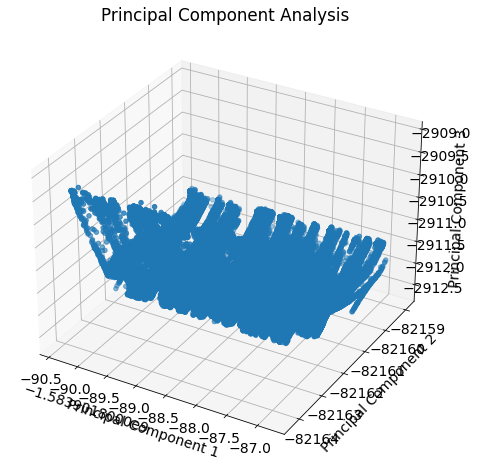

In [186]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

X_pca = pca.transform(standard_data_np)
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Principal Component Analysis')
plt.show()

Text(0, 0.5, 'Principal Component 3')

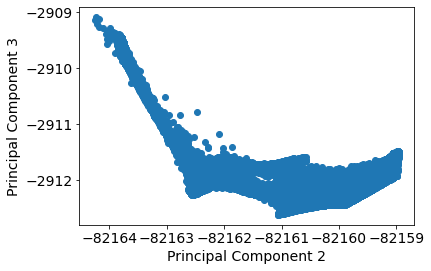

In [187]:
plt.scatter(X_pca[:,1], X_pca[:,2])
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')

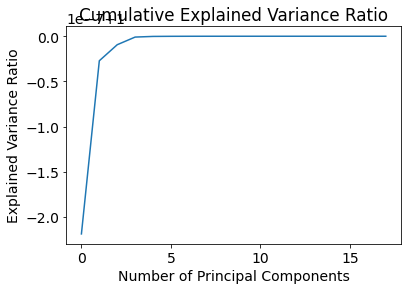

In [188]:
plt.plot(range(data_np.shape[1]), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

### Feature Correlation Heatmap

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [205]:
turbine = "BHR59"
field_data_filepath = f"../data/Field data/{turbine}.csv" 
raw_field_data_df = pd.read_csv(f"{field_data_filepath}") #.rename(columns={"Unnamed: 0": "t"})
field_data_df = raw_field_data_df.rename(columns={"RelWndDir": "wind_direction"}).drop(columns=["Available", "DateTime", "Unnamed: 0"]).dropna()

In [206]:
# identify month, day, hour of timestamps
field_data_df['Date'] = pd.to_datetime(field_data_df['t'], unit='s')
field_data_df["Month"] = field_data_df.Date.dt.month
field_data_df["Day"] = field_data_df.Date.dt.day
field_data_df["Hour"] = field_data_df.Date.dt.hour
field_data_df = field_data_df.drop(columns="Date")
cols = field_data_df.columns
data_np = field_data_df.to_numpy()
field_data_df

,index,AirDensity,AmbientTemperature,GeneratorSpeed,NacellePosition,OpSt,Pitch,TurbulenceIntensity,wind_direction,Power,WndSpd,WFCErrorCode,WFCStrategy,YawOffsetApplied,YawOffsetSetPoint,NacellePosition_corrected,t,Month,Day,Hour
0,737825.771528,1.174903,22.604069,1050.022955,195.0,5.0,1.470704,16.429638,7.217131,172.188524,3.949320,0.0,2.0,10.0,10.0,194.0,1580841060,2,4,18
1,737825.772222,1.174914,22.597193,1050.022943,195.0,5.0,1.637150,16.730179,5.246912,141.770491,3.723742,0.0,2.0,10.0,10.0,194.0,1580841120,2,4,18
2,737825.772917,1.174917,22.581974,1049.960657,195.0,5.0,1.520096,16.681732,6.578552,169.255737,3.927790,0.0,2.0,10.0,10.0,194.0,1580841180,2,4,18
3,737825.773611,1.174957,22.573618,1050.054095,195.0,5.0,1.473485,15.758614,8.543743,173.765574,3.962051,0.0,2.0,10.0,10.0,194.0,1580841240,2,4,18
4,737825.774306,1.175023,22.577051,1049.996724,195.0,5.0,1.529205,11.716015,10.326967,157.742621,3.859133,0.0,2.0,10.0,10.0,194.0,1580841300,2,4,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98185,737897.351389,1.162617,26.949090,1050.049180,287.0,5.0,2.301317,28.058497,2.972805,36.059016,2.691915,120.0,0.0,0.0,0.0,286.0,1587025560,4,16,8
98186,737897.352083,1.162402,27.053740,1050.142622,287.0,5.0,2.123133,28.847618,7.131102,71.347541,3.070403,120.0,0.0,0.0,0.0,286.0,1587025620,4,16,8
98187,737897.352778,1.162136,27.087328,1049.763934,287.0,5.0,2.045351,28.391596,4.852495,62.380328,3.012242,120.0,0.0,0.0,0.0,286.0,1587025680,4,16,8
98188,737897.353472,1.161963,27.071481,1050.103279,287.0,5.0,2.365733,25.681165,-16.580219,16.554098,2.429334,120.0,0.0,0.0,0.0,286.0,1587025740,4,16,8


In [207]:
standard_data_np = StandardScaler().fit_transform(data_np)
standard_data_df = pd.DataFrame(standard_data_np, columns=cols)

<AxesSubplot:>

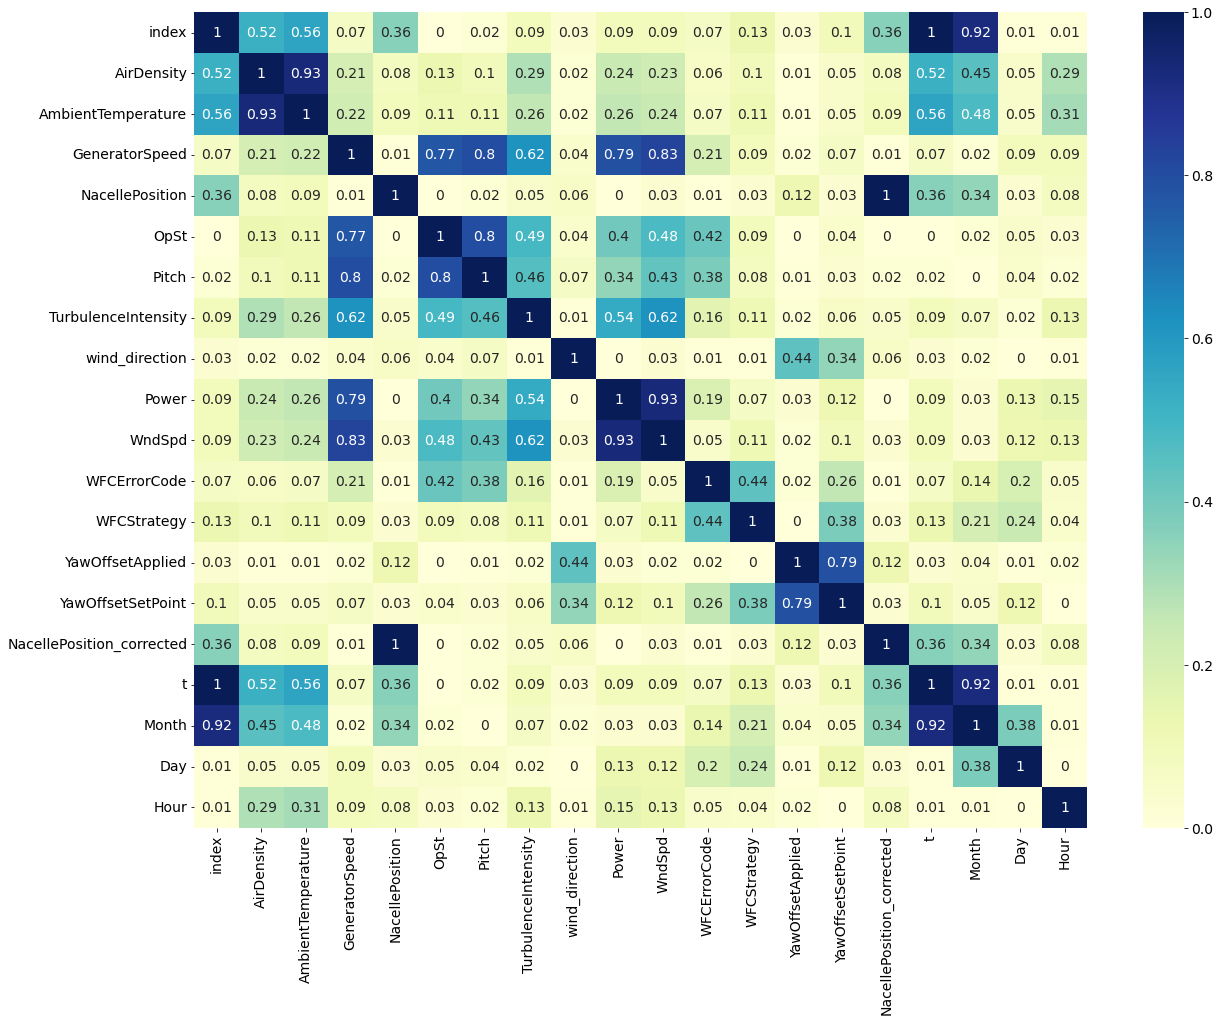

In [208]:
plt.subplots(figsize=(20,15))
sns.heatmap(abs(standard_data_df.corr()).round(2), cmap="YlGnBu", annot=True)

### T grid on the side (just implementing while the other code runs)

In [89]:
from datetime import datetime as dt
import math

In [76]:
def perfect_preview_control(data_df, T, temporal_resolution=60,deg_threshold=7,turbine_rot_speed=0.3,control_type="standard"):
    ''' 
    This function executes the identified wind farm control system informed by perfect preview information 
    of wind direction T into the future. The nacelle turbine position is referred to as "theta" and the wind direction is
    referred to as "phi"

    param data_df : pd.Dataframe : stores the time-series wind direction data 
            must have column names ["t" [seconds], "wind_direction" [degrees]]
    param T : int : forecasting period horizon
    param deg_threshold : float : the wind direction [degree] threshold at which turbine nacelle position should change
    turbine_rot_speed : float : the speed at which the turbine nacelle position is able to rotate [°/s]
    control_type : str : {"standard", "wake steering"}
    '''
    def get_delta_degrees(angle1, angle2):
        '''
        Returns the difference in degrees between inputed angles, considering circularity of degrees
        param angle1 : float : [deg]
        param angle2 : float : [deg]
        '''
        full_rotation = 360
        return min(abs(angle1 - angle2), abs(angle1 - angle2 - full_rotation))

    ## intialization
    # time and nacelle position at t=0
    t_0 = data_df.t.values[0]
    theta_t = data_df.wind_direction.values[0]
    # the maximum update frequency
    delta_t_interval = int(T/(temporal_resolution))
    N = int(data_df.shape[0]/delta_t_interval)
    # count of turbine nacelle direction updates
    duty = 0
    # store changes in nacelle position
    perfect_preview_update_schedule_df = pd.DataFrame(columns=["Interval", "T_initial", "T_final", "Perfect Preview Wind Direction (PPWD) (phi(t))", 
        "Low-pass-filter of PPWD (mean phi)", "Nacelle position (theta(t))",  "Delta Degree", "Nacelle Position Update (T/F)", "Nacelle Repositioning Duration (s)"])

    ## iterative nacelle updating
    for i in range(N-1):
        # define starting interval t_i
        t_i = i*T + t_0
        # get perfect preview data ("forecasted") along time horizon T
        t_interval_condition = ((data_df.t >= t_i) & (data_df.t < t_i+T))
        phi_T_i = data_df[t_interval_condition]["wind_direction"].values #data_df.wind_direction.values[t_i:t_i+(delta_t_interval)]
        # compute low-pass-filter of perfect preview data in window of size T
        mean_phi_T_i = np.mean(phi_T_i)
        # check whether update is needed
        delta_degree = get_delta_degrees(mean_phi_T_i, theta_t) # circular variable, finds shortest distance between directions
        # turbine nacelle update occurs
        if delta_degree > deg_threshold:
            update_nacelle = True

            if control_type == "standard":
                direction_change_factor = 1 if theta_t < mean_phi_T_i else -1 # whether to increase theta_t to reach goal forecasted direction
                delta_t = math.ceil((delta_degree/turbine_rot_speed)) # duration[s] it takes for turbine to change from theta_t -> mean_phi_T_i
                # append current nacelle position before repositioning
                row_results = [i, t_i, t_i+T, phi_T_i, mean_phi_T_i, theta_t, delta_degree, update_nacelle, delta_t]
                perfect_preview_update_schedule_df.loc[len(perfect_preview_update_schedule_df.index)] = row_results

                # print("Delta t ", delta_t)
                if delta_t < temporal_resolution:
                    theta_t = mean_phi_T_i
                    delta_degree = 0.0
                    update_nacelle = False
                    delta_t = 0.0
                    # append current nacelle position after repositioning, order of row entries correspond to column names above ^
                    row_results = [i, t_i+delta_t, t_i+T, phi_T_i, mean_phi_T_i, theta_t, delta_degree, update_nacelle, delta_t]
                    perfect_preview_update_schedule_df.loc[len(perfect_preview_update_schedule_df.index)] = row_results
                    duty += 1

                else:
                    # print("delta t > 1 min: ", delta_t)
                    for t_prime in range(1,delta_t):
                        # print("t_prime ", t_prime)
                        theta_t += direction_change_factor*turbine_rot_speed # iteratively updating nacelle
                        # print(theta_t)
                        delta_degree = get_delta_degrees(mean_phi_T_i, theta_t) # recalculate change in degrees between target and current nacelle pos.
                        # if t_prime is at the minute mark, add row to dataframe schedule
                        if t_prime%temporal_resolution == 0: 
                            # append current nacelle position after repositioning, order of row entries correspond to column names above ^
                            row_results = [i, t_i+t_prime, t_i+T, phi_T_i, mean_phi_T_i, theta_t, delta_degree, update_nacelle, delta_t-t_prime]
                            perfect_preview_update_schedule_df.loc[len(perfect_preview_update_schedule_df.index)] = row_results
                            duty += 1

            elif control_type == "wake steering":
                # duty += 1
                continue

        # no turbine nacelle update occurs
        else:
            update_nacelle = False
            delta_t = 0
            # order of row entries correspond to column names above ^
            row_results = [i, t_i, t_i+T, phi_T_i, mean_phi_T_i, theta_t, delta_degree, update_nacelle, delta_t]
            perfect_preview_update_schedule_df.loc[len(perfect_preview_update_schedule_df.index)] = row_results

    return perfect_preview_update_schedule_df, duty

In [82]:
def duty_T_grid_search(data_df, T_range, field_temporal_resolution, deg_threshold, turbine_rotation_speed, control_type="standard"):
    duties = []
    schedules = []
    for T in T_range:
        print("T = ", T)
        perfect_preview_update_schedule_df_i, duty_i = perfect_preview_control(data_df=field_data_df, T=T, deg_threshold=deg_threshold,turbine_rot_speed=turbine_rotation_speed,control_type=control_type)
        duties.append(duty_i)
        schedules.append(perfect_preview_update_schedule_df_i)
       
    return duties, schedules

In [103]:
# find the hourly duty 
def get_mean_hourly_duty(schedule_df):
    
    def convert_timestamps_to_datetime(schedule_df):
        schedule_df["Start datetime"] = pd.to_datetime([dt.fromtimestamp(t_0) for t_0 in schedule_df["T_initial"].values])
        schedule_df["End datetime"] = pd.to_datetime([dt.fromtimestamp(t_f) for t_f in schedule_df["T_final"].values])
        return schedule_df
    
    schedule_df = convert_timestamps_to_datetime(schedule_df)
    # identify month, day, hour of timestamps
    schedule_df["Month"] = schedule_df["Start datetime"].dt.month
    schedule_df["Day"] = schedule_df["Start datetime"].dt.day
    schedule_df["Hour"] = schedule_df["Start datetime"].dt.hour
    # add counter of whether duty occured (T = 1, F = 0)
    schedule_df["Duty"] = schedule_df["Nacelle Position Update (T/F)"].astype(int)
    # get mean hourly duty across entire schedule
    average_hourly_duty = schedule_df.groupby(by=["Month", "Day", "Hour"]).sum().mean()["Duty"]    
    return average_hourly_duty

In [142]:
def plot_grid_search_results(results,T_range, deg_threshold, turbine_rotation_speed, control_type, graph_title="allFieldData"):
    turbines = list(results.keys())
    colors = ["blue", "red", "green", "orange"]
    metrics = ["Yaw Duty", "Mean Hourly Yaw Duty", "Mean Yaw Error", "Std Dev Yaw Error"]
    for metric in metrics:
        plt.figure(figsize=(7,5))
        for i in range(len(turbines)):
            turbine = turbines[i]
            duties_i, schedules = results[turbine]
            color = colors[i]

            if metric == "Yaw Duty":
                # plt.plot(T_range, duties_i, color=color, label=turbine)
                plt.plot(T_range[-int(len(T_range)//1.5):], duties_i[-int(len(T_range)//1.5):], color=color, label=turbine)
            
            elif metric == "Mean Hourly Yaw Duty":
                hourly_duties_i = [get_mean_hourly_duty(schedule_df=schedule_i) for schedule_i in schedules]
                plt.plot(T_range, hourly_duties_i, color=color, label=turbine)
                

            else:
                mean_yaw_errors = []
                std_dev_yaw_errors = []
                for schedule in schedules:
                    mean_yew_error_i = np.mean(schedule["Delta Degree"])
                    mean_yaw_errors.append(mean_yew_error_i)
                    std_dev_yaw_error_i = np.std(schedule["Delta Degree"])
                    std_dev_yaw_errors.append(std_dev_yaw_error_i)
                if metric == "Mean Yaw Error": 
                    plt.plot(T_range, mean_yaw_errors, color=color, label=turbine)
                    min_mean_yaw_error_index = mean_yaw_errors.index(min(mean_yaw_errors))
                    print(min_mean_yaw_error_index, mean_yaw_errors[min_mean_yaw_error_index])
                    optimal_T_mean = T_range[min_mean_yaw_error_index]
                    print("Minimum mean yaw error at T = ", optimal_T_mean)
                
                elif metric == "Std Dev Yaw Error":
                    plt.plot(T_range, std_dev_yaw_errors, color=color, label=turbine)
                    min_stddev_yaw_error_index = std_dev_yaw_errors.index(min(std_dev_yaw_errors))
                    optimal_T_stdev = T_range[min_stddev_yaw_error_index]
                    print("Minimum std.dev. yaw error at T = ", optimal_T_stdev)

        plt.suptitle(f"Effect of Varying T Forecasting Horizons on the {metric}", y=1, fontsize=12)
        plt.title(f"Field Data (1 min resolution) [threshold[°]={deg_threshold}°, control={control_type}, rot.speed[°/s]={turbine_rotation_speed},]", fontsize=10)
        plt.xlabel("T time horizon (s)")
        plt.ylabel(f"{metric}")
        plt.savefig(f"{graph_title}_{control_type}_{metric.strip()}_T_threshold={deg_threshold}")
        plt.show()

In [131]:
def field_data_grid_search(field_temporal_resolution, turbines_list=["BHR58"], deg_threshold=0.6, turbine_rotation_speed=0.3, control_type="standard", graph_title=None):
    ''' 
    param turbines : [str] : list of the names/labels of turbines in the western india wind farm
    param deg_threshold : float : the threshold of delta degree the turbine should change nacelle position
    param turbine_rotation_speed : float : the speed at which the nacelle changes direction
    param control_type : str : {"standard", "wake steering}
    param graph_title : str : custome title to include in the final plot
    '''
    results = {}
    # iterate over turbines to open datasets
    for turbine in turbines_list:
        try: 
            field_data_filepath = f"../data/Field data/{turbine}.csv" 
            raw_field_data_df = pd.read_csv(f"{field_data_filepath}") #.rename(columns={"Unnamed: 0": "t"})
            field_data_df = raw_field_data_df[["t", "RelWndDir"]].rename(columns={"RelWndDir": "wind_direction"})
            # find the limits
            T_range = [field_temporal_resolution*(100*i) for i in range(1,980)]

            duties, schedules = duty_T_grid_search(field_data_df, T_range, field_temporal_resolution, deg_threshold, turbine_rotation_speed, control_type)

            results[turbine] = (duties, schedules)
        except Exception as e:
            print(e)
            continue
    try:   
        plot_grid_search_results(results,T_range, deg_threshold, turbine_rotation_speed, control_type, graph_title=graph_title+turbine)
    except Exception as e:
        print("Error plotting: ", e)

    return results

In [132]:
turbines = ["BHR58"]
field_temporal_resolution = 60 # [seconds]
deg_threshold = 6 # degrees
turbine_rotation_speed = 0.3
control_type = "standard"
results = field_data_grid_search(field_temporal_resolution, turbines, deg_threshold, turbine_rotation_speed, control_type)

T =  600


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:869: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


KeyboardInterrupt: 

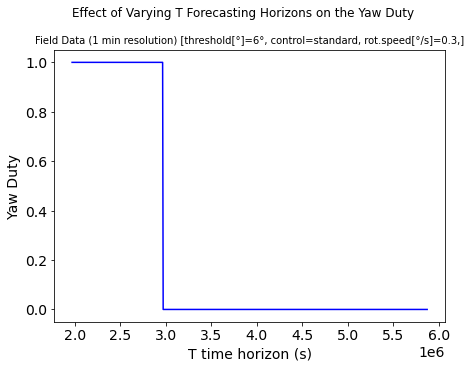

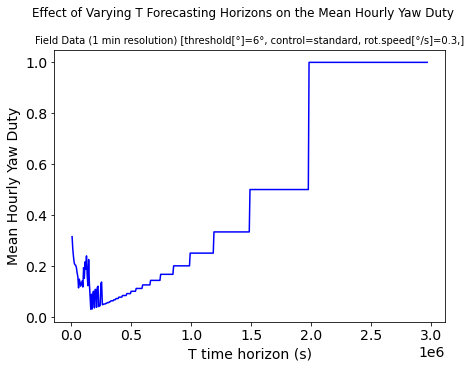

42 1.5325568430307863
Minimum mean yaw error at T =  258000


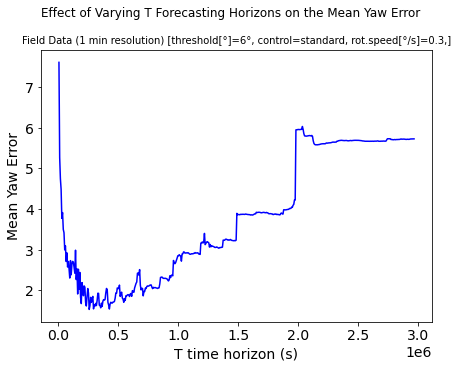

Minimum std.dev. yaw error at T =  162000


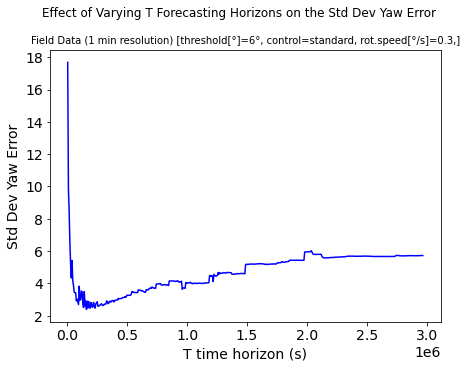

In [143]:
T_range = [field_temporal_resolution*(100*i) for i in range(1,980)]
plot_grid_search_results(results, T_range, deg_threshold, turbine_rotation_speed, control_type, graph_title="allFieldData")

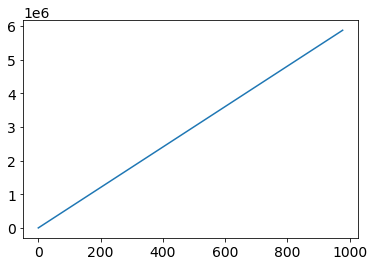

In [147]:
plt.plot(range(len(T_range)), T_range)

In [ ]:
duties, scheds = results[turbines[0]]
scheds[0]

,Interval,T_initial,T_final,Perfect Preview Wind Direction (PPWD) (phi(t)),Low-pass-filter of PPWD (mean phi),Nacelle position (theta(t)),Delta Degree,Nacelle Position Update (T/F),Nacelle Repositioning Duration (s),Start datetime,End datetime,Month,Day,Hour,Duty
0,0,1580841060,1580847060,"[-11.243843363933877, -3.3375592153580462, -5....",0.471847,-11.243843,11.715690,True,40,2020-02-04 13:31:00,2020-02-04 15:11:00,2,4,13,1
1,0,1580841060.0,1580847060,"[-11.243843363933877, -3.3375592153580462, -5....",0.471847,0.471847,0.000000,False,0.0,2020-02-04 13:31:00,2020-02-04 15:11:00,2,4,13,0
2,1,1580847060,1580853060,"[3.117978056923288, 2.926092851357382, 3.25721...",7.149624,0.471847,6.677777,True,23,2020-02-04 15:11:00,2020-02-04 16:51:00,2,4,15,1
3,1,1580847060.0,1580853060,"[3.117978056923288, 2.926092851357382, 3.25721...",7.149624,7.149624,0.000000,False,0.0,2020-02-04 15:11:00,2020-02-04 16:51:00,2,4,15,0
4,2,1580853060,1580859060,"[49.98724909297756, 50.23606509849673, 50.8488...",12.863052,7.149624,5.713428,False,0,2020-02-04 16:51:00,2020-02-04 18:31:00,2,4,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,982,1586733060,1586739060,"[11.516133847783824, 1.3849316503180833, -2.27...",-1.994303,-0.124884,1.869420,False,0,2020-04-12 19:11:00,2020-04-12 20:51:00,4,12,19,0
1227,983,1586739060,1586745060,"[2.76125681204874, 4.647540983606557, 3.877049...",4.485296,-0.124884,4.610179,False,0,2020-04-12 20:51:00,2020-04-12 22:31:00,4,12,20,0
1228,984,1586745060,1586751060,"[0.2661252920744849, 0.1234963331066194, 1.925...",5.301337,-0.124884,5.426221,False,0,2020-04-12 22:31:00,2020-04-13 00:11:00,4,12,22,0
1229,985,1586751060,1586757060,"[5.330917073077843, 4.565281930516978, 5.71623...",0.122891,-0.124884,0.247774,False,0,2020-04-13 00:11:00,2020-04-13 01:51:00,4,13,0,0


ValueError: x and y must have same first dimension, but have shapes (100,) and (200,)

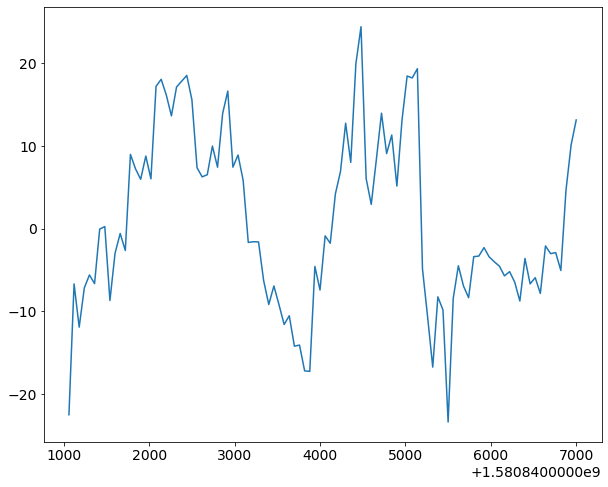

In [227]:
# plotting schedules
schedule_to_plot = scheds[0]
# for index, row in schedule_to_plot.iterrows():

for i in range(schedule_to_plot.shape[0]):
    row1 = schedule_to_plot.iloc[i]
    plt.figure(figsize=(10,8))
    
    row2 = schedule_to_plot.iloc[i+1]
    t = range(row1["T_initial"],row2["T_final"],60)
    ppwd = row1["Perfect Preview Wind Direction (PPWD) (phi(t))"] + row2["Perfect Preview Wind Direction (PPWD) (phi(t))"]
    lpf =  [row1["Low-pass-filter of PPWD (mean phi)"]]*len(row1["Perfect Preview Wind Direction (PPWD) (phi(t))"]) +  [row2["Low-pass-filter of PPWD (mean phi)"]]*len(row2["Perfect Preview Wind Direction (PPWD) (phi(t))"])
    turbine_pos = [row1["Nacelle position (theta(t))"]]*len(row1["Perfect Preview Wind Direction (PPWD) (phi(t))"]) +  [row2["Nacelle position (theta(t))"]]*len(row2["Perfect Preview Wind Direction (PPWD) (phi(t))"])
    plt.plot(t, ppwd, label= "PPWD (alpha(t))")
    plt.plot(t, lpf, label= "LPF of PPWD (alpha(t))")
    plt.plot(t, turbine_pos, label= "Nacelle position")
    
    # plt.plot(range(row["T_initial"],row["T_final"],60), row["Perfect Preview Wind Direction (PPWD) (phi(t))"], label="PPWD (alpha(t))")
    # plt.plot(range(row["T_initial"],row["T_final"],60), [row["Low-pass-filter of PPWD (mean phi)"]]*len(row["Perfect Preview Wind Direction (PPWD) (phi(t))"]), linestyle='dashed', label="LPF of PPWD")
    # plt.plot(range(row["T_initial"],row["T_final"],60), [row["Nacelle position (theta(t))"]]*len(row["Perfect Preview Wind Direction (PPWD) (phi(t))"]), linestyle='dashed', label="Nacelle position (theta(t))")
    
    # plt.plot(range(next_row["T_initial"],next_row["T_final"],60), next_row["Perfect Preview Wind Direction (PPWD) (phi(t))"], label="PPWD (alpha(t))")
    # plt.plot(range(next_row["T_initial"],next_row["T_final"],60), [next_row["Low-pass-filter of PPWD (mean phi)"]]*len(next_row["Perfect Preview Wind Direction (PPWD) (phi(t))"]), linestyle='dashed', label="LPF of PPWD")
    # plt.plot(range(next_row["T_initial"],next_row["T_final"],60), [next_row["Nacelle position (theta(t))"]]*len(next_row["Perfect Preview Wind Direction (PPWD) (phi(t))"]), linestyle='dashed', label="Nacelle position (theta(t))")
    plt.legend()
    plt.xlabel("t (s)")
    plt.ylabel("Wind Direction [°]")
    plt.title("Perfect Preview-Based Wind Turbine Control")


    break

In [ ]:
## finding distance from average wind dir magnitude across t interval
average_distance = []
for sched in scheds:
    means = []
    for index, row in sched.iterrows():
        means.append(np.mean(row["Perfect Preview Wind Direction (PPWD) (phi(t))"]))
    sched["Mean perfect preview wind dir"] = means
    sched["Distance from mean"] = sched["Nacelle position (theta(t))"] - sched["Mean perfect preview wind dir"]
    average_distance.append(np.mean(sched["Distance from mean"]))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Delta Degree [°]')

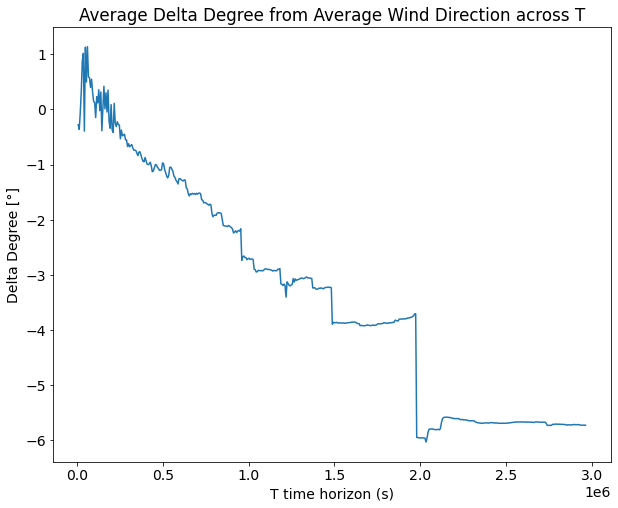

In [ ]:
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(10,8))
plt.plot(T_range, average_distance)
plt.title("Average Delta Degree from Average Wind Direction across T")
plt.xlabel("T time horizon (s)")
plt.ylabel("Delta Degree [°]")

In [117]:
scheds[0]["Distance from mean"] = scheds[0]["Nacelle position (theta(t))"] - scheds[0]["Mean perfect preview wind dir"]
np.mean(scheds[0]["Distance from mean"])

-0.27912660204682893

In [ ]:
field_data_filepath = f"../data/Field data/{turbine}.csv" 
raw_field_data_df = pd.read_csv(f"{field_data_filepath}") #.rename(columns={"Unnamed: 0": "t"})
field_data_df = raw_field_data_df.rename(columns={"RelWndDir": "wind_direction"}).drop(columns=["DateTime", "Unnamed: 0"])
data_np = field_data_df.to_numpy()
field_data_df

,index,Available,AirDensity,AmbientTemperature,GeneratorSpeed,NacellePosition,OpSt,Pitch,TurbulenceIntensity,wind_direction,Power,WndSpd,WFCErrorCode,WFCStrategy,YawOffsetApplied,YawOffsetSetPoint,NacellePosition_corrected,t
0,737825.771528,1.0,1.173125,23.184921,1049.852459,228.000000,5.0,1.680039,14.168282,-4.430492,130.437705,3.617077,120.0,0.0,0.0,0.0,203.700000,1580841060
1,737825.772222,1.0,1.173190,23.156068,1049.959016,228.000000,5.0,1.785424,14.175444,2.149563,121.419673,3.547950,120.0,0.0,0.0,0.0,203.700000,1580841120
2,737825.772917,1.0,1.173237,23.128196,1050.029505,228.000000,5.0,1.786719,13.202886,-2.633825,124.078689,3.570445,120.0,0.0,0.0,0.0,203.700000,1580841180
3,737825.773611,1.0,1.173307,23.111354,1049.901637,228.000000,5.0,1.796261,10.599141,-1.487978,116.580328,3.508430,120.0,0.0,0.0,0.0,203.700000,1580841240
4,737825.774306,1.0,1.173365,23.104430,1050.344268,228.000000,5.0,1.780472,9.970063,-5.336175,136.136065,3.637560,120.0,0.0,0.0,0.0,203.700000,1580841300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98595,737897.344444,1.0,1.162050,27.050601,1047.759013,269.000000,5.0,2.467391,41.718577,21.362832,-9.018033,2.043678,120.0,0.0,0.0,0.0,262.000000,1587024960
98596,737897.345139,1.0,1.161964,27.030553,1047.832786,269.000000,5.0,2.467678,52.646037,6.223006,2.952459,2.176495,120.0,0.0,0.0,0.0,262.000000,1587025020
98597,737897.345833,1.0,1.161870,27.168985,1050.165569,275.622951,5.0,2.338120,67.670933,6.990911,43.759017,2.745212,120.0,0.0,0.0,0.0,268.622951,1587025080
98598,737897.346528,1.0,1.161679,27.319791,1049.870487,281.000000,5.0,2.135801,54.470190,8.156903,57.180328,2.937458,120.0,0.0,0.0,0.0,274.000000,1587025140
